In [3]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=e71e788ad2e9b722aaa9978818dc4c67d12a4b2ba67093a3823311ca0fc91de7
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

## Importing pandasql 
import pandasql as psql
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
JobData = pd.read_csv('/content/drive/My Drive/JobDescriptionPrediction/Resources/Data/raw/indeed_job_dataset.csv')

# 1.Top 5 Locations having highest no of Job openings

In [ ]:
job_loc = psql.sqldf("SELECT DISTINCT Location, count(*) AS No_Of_Jobs, ((Count(*)* 100 / (Select Count(*) From JobData where Location <>'NONE')) || '%') AS PCT\
                                from JobData\
                                where Location <>'NONE'\
                                GROUP BY Location\
                                 order by No_Of_Jobs DESC LIMIT 5" )
job_loc


,Location,No_Of_Jobs,PCT
0,CA,1395,25%
1,NY,601,11%
2,VA,334,6%
3,TX,329,6%
4,MA,271,4%


<BarContainer object of 5 artists>

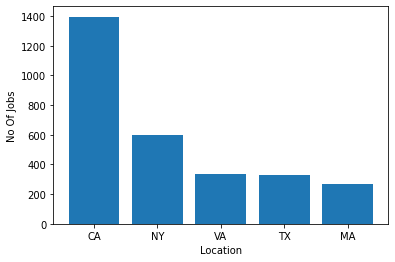

In [ ]:
plt.xlabel("Location")
plt.ylabel("No Of Jobs")
plt.bar(job_loc['Location'], job_loc['No_Of_Jobs'])

# 2.Jobs In Demand?

In [ ]:
job_skill = psql.sqldf("SELECT  distinct Job_Title, count(Job_Title) As No_Of_Jobs, ((Count(Job_Title)* 100 / (Select Count(*) From JobData)) || '%') AS PCT\
                                from JobData\
                                GROUP BY Job_Title\
                                ORDER BY No_Of_Jobs DESC LIMIT 5")
job_skill

,Job_Title,No_Of_Jobs,PCT
0,Data Scientist,715,12%
1,Data Analyst,405,7%
2,Data Engineer,391,6%
3,Senior Data Scientist,205,3%
4,Senior Data Engineer,136,2%


<BarContainer object of 5 artists>

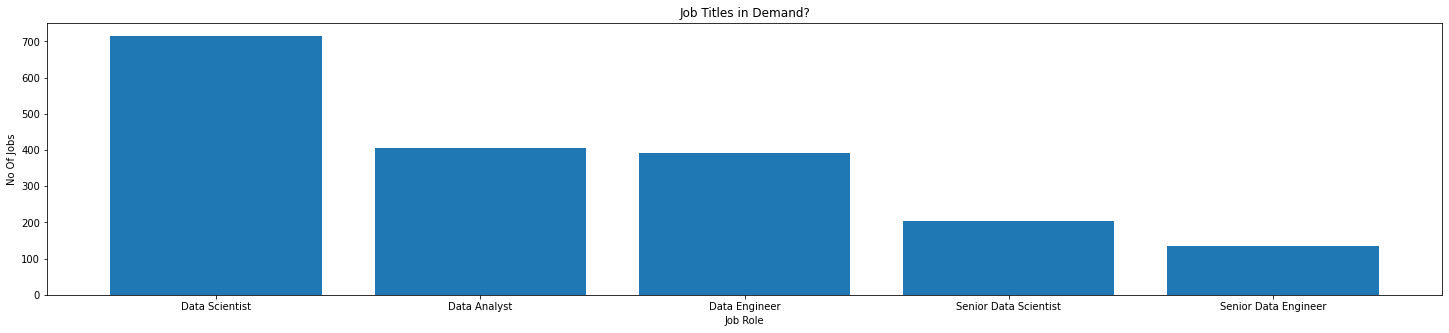

In [ ]:
fig = plt.figure(figsize = (25, 5))
plt.xlabel("Job Role")
plt.ylabel("No Of Jobs")
plt.title("Job Titles in Demand?")
plt.bar(job_skill['Job_Title'], job_skill['No_Of_Jobs'])

# 3.Is Job Title related to location?

In [ ]:
job_skill_loc = psql.sqldf("SELECT DISTINCT Job_Title, Location , count(*) AS No_Of_Jobs\
                                from JobData\
                                where Location <>'NONE'\
                                GROUP BY Job_Title\
                                ORDER BY No_Of_Jobs DESC LIMIT 5")
job_skill_loc

,Job_Title,Location,No_Of_Jobs
0,Data Scientist,DC,713
1,Data Analyst,NY,405
2,Data Engineer,CA,294
3,Senior Data Scientist,MA,205
4,Senior Data Engineer,NY,111


# Job Openings Distribution

## 4.Any Industry on a Hiring Surge?


In [ ]:
def getSqlMethod1():
  job_ind = psql.sqldf("SELECT  distinct Company_Industry, count(*) As No_Of_Jobs, ((Count(*)* 100 / (Select Count(*) From JobData)) || '%') AS PCT\
                                from JobData \
                                GROUP BY Company_Industry HAVING Company_Industry <>'NONE'\
                                ORDER BY No_Of_Jobs DESC LIMIT 5")
  return job_ind

getSqlMethod1()

,Company_Industry,No_Of_Jobs,PCT
0,Consulting and Business Services,733,12%
1,Internet and Software,647,11%
2,Banks and Financial Services,459,8%
3,Health Care,339,5%
4,Insurance,227,3%


<BarContainer object of 5 artists>

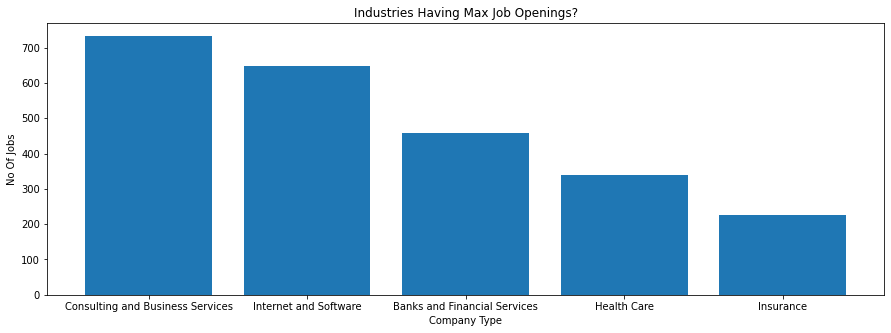

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.xlabel("Company Type")
plt.ylabel("No Of Jobs")
plt.title("Industries Having Max Job Openings?")
plt.bar(getSqlMethod1()['Company_Industry'], getSqlMethod1()['No_Of_Jobs'])

## 5.Any Company on  a Hiring Surge?


In [ ]:
def getSqlMethod2():
  job_cmp = psql.sqldf("SELECT  distinct Company, count(*) As No_Of_Jobs, ((Count(*)* 100 / (Select Count(*) From JobData)) || '%') AS PCT\
                                from JobData \
                                GROUP BY Company HAVING Company <>'NONE'\
                                ORDER BY No_Of_Jobs DESC LIMIT 5")
  return job_cmp.head()

getSqlMethod2()

,Company,No_Of_Jobs,PCT
0,Booz Allen Hamilton,151,2%
1,Harnham,87,1%
2,Capgemini,84,1%
3,Facebook,65,1%
4,KPMG LLP,64,1%


<BarContainer object of 5 artists>

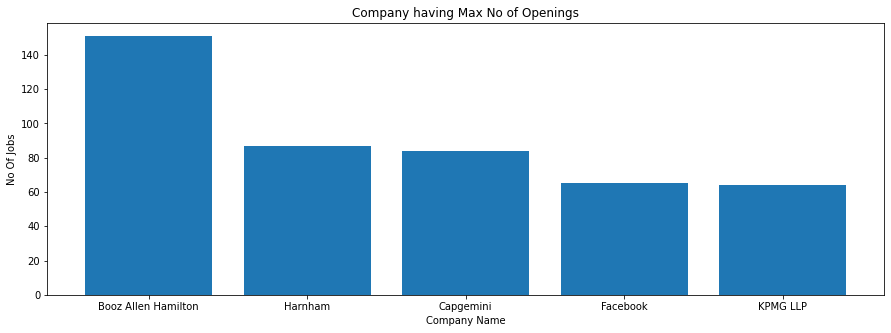

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.xlabel("Company Name")
plt.ylabel("No Of Jobs")
plt.title("Company having Max No of Openings")
plt.bar(getSqlMethod2()['Company'], getSqlMethod2()['No_Of_Jobs'])

## 6.Total Openings for Data Scientist Role

In [ ]:
job_ds = psql.sqldf("SELECT     count(Job_Title) As No_Of_DataScience_Jobs, ((Count(Job_Title)* 100 / (Select Count(*) From JobData)) || '%') AS PCT\
                                from JobData\
                                 WHERE Job_Title like '%Data Scientist%'")
job_ds

,No_Of_DataScience_Jobs,PCT
0,2385,41%


## 7.Most Recent Openings 

In [ ]:
def getSqlMethod3():
  JP = psql.sqldf("select Company, Job_Type, Date_Since_Posted, count(*) from JobData where Date_Since_Posted <= 7 group by Company order by Date_Since_Posted, count(*) desc")
  return JP

getSqlMethod3()

,Company,Job_Type,Date_Since_Posted,count(*)
0,Cognizant,data_engineer,1.0,8
1,Capgemini,data_analyst,1.0,7
2,Centene,data_analyst,1.0,6
3,GlassDoor,data_engineer,1.0,6
4,All-In Analytics,data_engineer,1.0,5
...,...,...,...,...
523,Virginia Tech,data_engineer,7.0,1
524,WebMD,data_analyst,7.0,1
525,Wish,data_analyst,7.0,1
526,Xactly Corporation,data_scientist,7.0,1


## 8.Data Analyst openings across locations

In [ ]:
DAJC = psql.sqldf(" select Location, count(Job_Title) as No_of_openings, avg(Queried_Salary) as Avg_Salary from JobData \
                    where Job_Type = 'data_analyst' \
                    group by Location \
                    order by count(Job_Title) desc limit 10")
DAJC

,Location,No_of_openings,Avg_Salary
0,CA,376,65372.340426
1,NY,230,56695.652174
2,TX,117,41880.341880
3,MA,86,41627.906977
4,VA,85,57882.352941
5,IL,66,51818.181818
6,GA,59,38305.084746
7,WA,57,49824.561404
8,PA,56,35000.000000
9,MD,55,45454.545455


# Planning to be  a Data Scientist?


##  9.Data Science Hub?

In [ ]:
def getSqlMethod9():
  job_ds_loc = psql.sqldf("SELECT     Location, count(Job_Title) As No_Of_DataScience_Jobs,\
                                  ((Count(Job_Title)* 100 / (SELECT     count(Job_Title) As No_Of_DataScience_Jobs from JobData WHERE Job_Title like '%Data Scientist%')) \
                                  || '%') AS PCT\
                                from JobData\
                                 WHERE Job_Title like '%Data Scientist%'\
                                  GROUP BY Location\
                                  ORDER BY No_Of_DataScience_Jobs DESC\
                                  LIMIT 5       ") 
  return job_ds_loc            

getSqlMethod9()                  

,Location,No_Of_DataScience_Jobs,PCT
0,CA,640,26%
1,NY,228,9%
2,VA,177,7%
3,TX,133,5%
4,MA,121,5%


<BarContainer object of 5 artists>

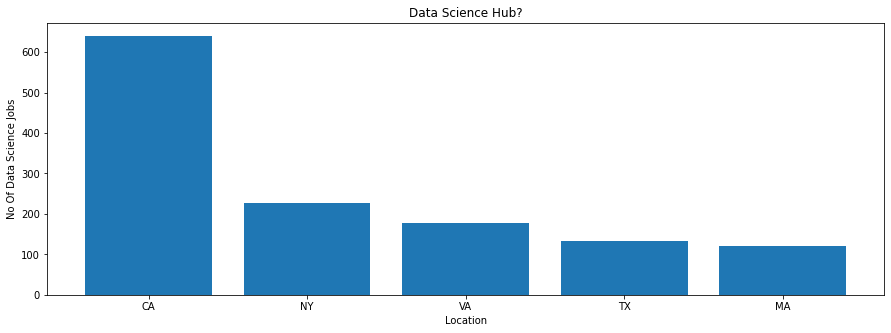

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.xlabel("Location")
plt.ylabel("No Of Data Science Jobs")
plt.title("Data Science Hub?")
plt.bar(getSqlMethod9() ['Location'], getSqlMethod9() ['No_Of_DataScience_Jobs'])

## 10.Industries for you?


In [ ]:
job_ds_ind = psql.sqldf("SELECT     Company_Industry, count(Job_Title) As No_Of_DataScience_Jobs,\
                                  ((Count(Job_Title)* 100 / (SELECT     count(Job_Title) As No_Of_DataScience_Jobs from JobData WHERE Job_Title like '%Data Scientist%' AND Company_Industry <>'None')) \
                                  || '%') AS PCT\
                                from JobData\
                                 WHERE Job_Title like '%Data Scientist%' AND Company_Industry <>'None'\
                                  GROUP BY Company_Industry\
                                  ORDER BY No_Of_DataScience_Jobs DESC\
                                  LIMIT 5       ")           
                                

job_ds_ind 

,Company_Industry,No_Of_DataScience_Jobs,PCT
0,Consulting and Business Services,372,22%
1,Internet and Software,298,18%
2,Banks and Financial Services,163,10%
3,Health Care,113,6%
4,Insurance,84,5%


## 11.Skills for you?

In [ ]:
query = psql.sqldf("SELECT * FROM JobData where 1=2")
query

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries


In [ ]:
pd.set_option('display.max_colwidth', None)
sq = psql.sqldf("SELECT distinct  Skill , count(*) AS No_Of_Count FROM JobData\
                                WHERE Job_Title like '%Data Scientist%' GROUP BY Skill\
                                  ORDER BY No_Of_Count DESC LIMIT 5       ")           
sq     

,Skill,No_Of_Count
0,None,41
1,"['TensorFlow', 'Linux', 'Machine Learning', 'Google Cloud Platform', 'Azure', 'Solr', 'SQL', 'Natural Language Processing', 'OOP', 'Threading', 'AI', 'Image Processing', 'Git', 'Python', 'Elasticsearch', 'AWS']",17
2,['Machine Learning'],14
3,"['TensorFlow', 'Linux', 'Machine Learning', 'Google Cloud Platform', 'Azure', 'Solr', 'SQL', 'Natural Language Processing', 'Threading', 'AI', 'Image Processing', 'Git', 'Python', 'Elasticsearch', 'AWS']",14
4,"['Machine Learning', 'Python']",13


# 12.Most Popular Skills as per Job Type?

In [ ]:
def getSqlMethod4():
  pq = psql.sqldf("SELECT    distinct Job_Type, sum(python) As Python_Jobs,\
                                   sum(sql) As SQL,  sum(r) AS R, sum(hadoop) AS Hadoop,\
                                   sum(tableau) AS Tableau, sum(sas) AS SAS, sum(spark) AS Spark, sum(Java) As JAVA, sum(Others) As Others\
                                from JobData\
                                 GROUP BY Job_Type\
                                   LIMIT 5       ")           
  return pq 

getSqlMethod4()                             

,Job_Type,Python_Jobs,SQL,R,Hadoop,Tableau,SAS,Spark,JAVA,Others
0,data_analyst,512,1044,456,126,538,310,67,101,1462
1,data_engineer,901,867,228,761,214,67,719,704,1338
2,data_scientist,1912,1193,1550,827,484,564,745,675,2352


# 13.Top Skills Across Industry

In [ ]:
def getSqlMethod5():
  pq_ind = psql.sqldf("SELECT    distinct Company_Industry, sum(python) As Python_Jobs,\
                                   sum(sql) As SQL,  sum(r) AS R, sum(hadoop) AS Hadoop,\
                                   sum(tableau) AS Tableau, sum(sas) AS SAS, sum(spark) AS Spark, sum(Java) As JAVA, sum(Others) As Others,\
                                (sum(python) + sum(sql) + sum(r) + sum(hadoop) +\
                                   sum(tableau) + sum(sas) + sum(spark) + sum(Java) + sum(Others) ) As Total\
                                from JobData WHERE Company_Industry <> 'None'\
                                 GROUP BY Company_Industry\
                                 ORDER BY Total DESC\
                                   LIMIT 5 ")           
  return pq_ind   

getSqlMethod5()                           

,Company_Industry,Python_Jobs,SQL,R,Hadoop,Tableau,SAS,Spark,JAVA,Others,Total
0,Consulting and Business Services,426,338,275,270,200,121,235,172,658,2695
1,Internet and Software,432,376,266,242,105,82,212,192,583,2490
2,Banks and Financial Services,264,267,171,165,105,96,160,155,436,1819
3,Health Care,126,180,112,56,82,92,51,53,290,1042
4,Insurance,124,135,103,93,49,59,35,69,194,861


# 14.Most Preferred Industries to work for As per ratings

In [ ]:

job_satisfaction = psql.sqldf("SELECT  distinct Company_Industry,Queried_Salary	, No_of_Reviews,avg(No_Of_stars) AS Avg_Rating,\
                                ((No_of_stars*No_of_Reviews)/( SELECT sum(No_of_Reviews) FROM JobData))AS Weighted_Rating\
                                from JobData  WHERE No_of_Reviews > 4000\
                                GROUP BY Company_Industry \
                                ORDER BY Weighted_Rating DESC   LIMIT 3")
job_satisfaction

,Company_Industry,Queried_Salary,No_of_Reviews,Avg_Rating,Weighted_Rating
0,Retail,140000-159999,157475.0,3.636046,0.027665
1,RetailConsumer Goods and Services,120000-139999,41290.0,3.800000,0.007657
2,Food and Beverages,80000-99999,33082.0,3.700000,0.005973


# 15.No of Reviews related to Rating?

In [ ]:
job_feedback = psql.sqldf("SELECT  distinct Company, No_of_Reviews ,avg(No_Of_stars) AS Avg_Rating \
                                from JobData group by Company\
                                ORDER BY No_Of_Reviews DESC   LIMIT 6")
job_feedback

,Company,No_of_Reviews,Avg_Rating
0,Walmart,157475.0,3.6
1,The Home Depot,41290.0,3.8
2,SUBWAY,33082.0,3.7
3,AT&T,31970.0,3.8
4,Wells Fargo,29966.0,3.8
5,Lowe's,29206.0,3.7


In [ ]:
job_rating = psql.sqldf("SELECT  distinct Company, No_of_Reviews, Queried_Salary	,avg(No_Of_stars) AS Avg_Rating \
                                from JobData WHERE No_of_Reviews > 2000 group by Company\
                                ORDER BY Avg_Rating ASC ,No_of_Reviews DESC   LIMIT 6")
job_rating

,Company,No_of_Reviews,Queried_Salary,Avg_Rating
0,Conduent,2774.0,100000-119999,2.8
1,Rent-A-Center,3822.0,80000-99999,3.2
2,West Corporation,3094.0,100000-119999,3.3
3,"XPO Logistics, Inc.",3484.0,80000-99999,3.3
4,DISH,4479.0,120000-139999,3.3
5,Express Scripts,3301.0,100000-119999,3.3


# Hard to fill positions

## 16.Are Senior Positions Hard to Fill? 

In [ ]:
pd.set_option('display.max_colwidth', None)
job_date = psql.sqldf("SELECT distinct Job_Title ,Company_Industry, Queried_Salary,Date_Since_Posted\
                               FROM JobData\
                                GROUP BY Job_Title\
                                ORDER BY Date_Since_Posted DESC LIMIT 10")

job_date

,Job_Title,Company_Industry,Queried_Salary,Date_Since_Posted
0,2019 PhD Data Scientist Internship - UberEverything,Internet and Software,120000-139999,30.0
1,2019 PhD Data Scientist Internship - UberEverything - New Yo...,Internet and Software,120000-139999,30.0
2,23103 Principal Data Scientist - HealthTech / Diagnostics -...,None,140000-159999,30.0
3,23222 Senior Data Scientist (Machine Learning / Computer Vis...,None,140000-159999,30.0
4,36th EWS Mission Data Analyst,Aerospace and Defense,80000-99999,30.0
5,5G+ Wireless Machine Learning Research Scientist,Computers and Electronics,140000-159999,30.0
6,AI Chief Data Scientist - PS12747,Health Care,100000-119999,30.0
7,AI Principal Data Scientist - PS12776,Health Care,80000-99999,30.0
8,AI Scientist - Machine Learning Focus,Internet and Software,80000-99999,30.0
9,AI Scientist - NLP Focus,Internet and Software,120000-139999,30.0


## 17.Jobs Not Filled in a month

In [ ]:
job_count = psql.sqldf("SELECT count(Job_Title) , Date_Since_Posted\
                               FROM JobData WHERE Date_Since_Posted = 30\
                                ORDER BY Date_Since_Posted DESC ")

job_count

,count(Job_Title),Date_Since_Posted
0,2954,30.0


## 18.Particular Industries having more unlosed jobs?

In [ ]:
job_date_cmp = psql.sqldf("SELECT distinct Company_Industry , Date_Since_Posted, count(*) AS No_of_unfilled_Jobs\
                               FROM JobData where Date_Since_Posted = 30 \
                                GROUP BY Company_Industry\
                                ORDER BY No_of_unfilled_Jobs DESC LIMIT 10")

job_date_cmp

,Company_Industry,Date_Since_Posted,No_of_unfilled_Jobs
0,None,30.0,966
1,Consulting and Business Services,30.0,395
2,Internet and Software,30.0,316
3,Banks and Financial Services,30.0,248
4,Health Care,30.0,181
5,Insurance,30.0,124
6,Industrial Manufacturing,30.0,74
7,Aerospace and Defense,30.0,73
8,Retail,30.0,68
9,Consumer Goods and Services,30.0,56


## 19.Bigger corporations have harder time filling the job?

In [ ]:
def getSqlMethod7():
  job_date_cmp = psql.sqldf("SELECT distinct Company , Company_Employees, Date_Since_Posted, count(*) AS No_of_unfilled_Jobs\
                               FROM JobData where Date_Since_Posted = 30 \
                                GROUP BY Company\
                                ORDER BY No_of_unfilled_Jobs DESC LIMIT 10")
  return job_date_cmp

getSqlMethod7()

,Company,Company_Employees,Date_Since_Posted,No_of_unfilled_Jobs
0,Booz Allen Hamilton,"10,000+",30.0,78
1,Harnham,"Less than 10,000",30.0,69
2,KPMG LLP,None,30.0,47
3,Walmart,"10,000+",30.0,38
4,Capgemini,"10,000+",30.0,33
5,Capital One,"10,000+",30.0,29
6,Allstate,"10,000+",30.0,28
7,Microsoft,"10,000+",30.0,25
8,Uber,"10,000+",30.0,25
9,JPMorgan Chase,"10,000+",30.0,23


## 20.Is it because of unrealistic expecations?

In [ ]:
job_date_skill = psql.sqldf("SELECT distinct  Skill, Company, Date_Since_Posted,No_of_Skills	, count(*) AS No_of_unfilled_Jobs\
                               FROM JobData where Date_Since_Posted = 30 \
                                GROUP BY Skill, Company\
                                ORDER BY No_of_unfilled_Jobs DESC LIMIT 10")

job_date_skill

,Skill,Company,Date_Since_Posted,No_of_Skills,No_of_unfilled_Jobs
0,"['TensorFlow', 'Linux', 'Machine Learning', 'Google Cloud Platform', 'Azure', 'Solr', 'SQL', 'Natural Language Processing', 'OOP', 'Threading', 'AI', 'Image Processing', 'Git', 'Python', 'Elasticsearch', 'AWS']",KPMG LLP,30.0,16,17
1,"['TensorFlow', 'Linux', 'Machine Learning', 'Google Cloud Platform', 'Azure', 'Solr', 'SQL', 'Natural Language Processing', 'Threading', 'AI', 'Image Processing', 'Git', 'Python', 'Elasticsearch', 'AWS']",KPMG LLP,30.0,15,14
2,"['Hive', 'R', 'SQL', 'Big Data', 'Jenkins', 'Jira', 'Hadoop', 'Scala', 'Kafka', 'CI/CD', 'Tableau', 'Java', 'Git', 'Python']",Allstate,30.0,14,11
3,"['R', 'SAS', 'Python', 'SQL', 'Tableau']",All-In Analytics,30.0,5,10
4,"['TensorFlow', 'Machine Learning', 'TS/SCI Clearance', 'Hadoop', 'R', 'Tableau', 'Splunk', 'Natural Language Processing', 'MongoDB', 'Docker', 'Python', 'Elasticsearch']",Booz Allen Hamilton,30.0,12,10
5,"['Hive', 'R', 'SQL', 'Big Data', 'Jenkins', 'Jira', 'Hadoop', 'Scala', 'Kafka', 'CI/CD', 'Java', 'Git', 'Python']",Allstate,30.0,13,7
6,"['Data Mining', 'Machine Learning', 'Statisical Analysis']",Alion Science and Technology,30.0,3,6
7,"['Hadoop', 'SAS', 'Oracle', 'SQL', 'Data Warehouse']",Wells Fargo,30.0,5,6
8,"['Hive', 'Machine Learning', 'Hadoop', 'R', 'Lean', 'SQL', 'Java', 'Big Data', 'Spark', 'Python', 'Signal Processing']",Xylem,30.0,11,6
9,"['Linux', 'Hive', 'Perl', 'Azure', 'SQL', 'Big Data', 'Informatica', 'Data Mining', 'PowerShell', 'Pentaho', 'Hadoop', 'Tableau', 'Teradata', '.Net', 'Alteryx', 'MongoDB', 'Spark', 'Shell Scripting', 'Python', 'AWS']",KPMG LLP,30.0,20,6


In [ ]:
job_recent = psql.sqldf("SELECT avg(No_of_Skills) \
                               FROM JobData WHERE Date_Since_Posted =30\
                                ORDER BY Date_Since_Posted DESC ")

job_recent

,avg(No_of_Skills)
0,8.052133


In [ ]:
job_count = psql.sqldf("SELECT count(Job_Title) , Date_Since_Posted\
                               FROM JobData WHERE Date_Since_Posted = 30 AND No_of_Skills >= 8\
                                ORDER BY Date_Since_Posted DESC ")

job_count

,count(Job_Title),Date_Since_Posted
0,1403,30.0


# Positions in Demand

## 21.Top 5 Data Analyst Positions 

In [ ]:
## 3.Top 5 Data Analyst Positions 

DAT = psql.sqldf("select Job_Title, count(Job_Title) as no_of_openings from JobData where Job_Type = 'data_analyst' group by Job_Title order by count(Job_Title) desc limit 5")
DAT

,Job_Title,no_of_openings
0,Data Analyst,405
1,Senior Data Analyst,86
2,Marketing Data Analyst,29
3,Data Analyst II,26
4,Business Data Analyst,24


## 22.Top 5 Data Analyst Positions 

In [ ]:
DAT = psql.sqldf("select Job_Title, count(Job_Title) as no_of_openings from JobData where Job_Type = 'data_analyst' group by Job_Title order by count(Job_Title) desc limit 5")
DAT

,Job_Title,no_of_openings
0,Data Analyst,405
1,Senior Data Analyst,86
2,Marketing Data Analyst,29
3,Data Analyst II,26
4,Business Data Analyst,24


Text(0.5, 1.0, '5 Most Frequent Data Analyst Job Titles')

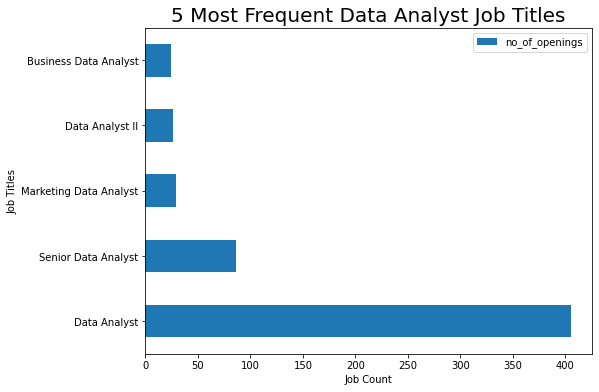

In [ ]:
DAT.set_index(DAT.Job_Title, drop=True, inplace=True)
DAT.plot(kind='barh', figsize = (8,6), subplots=True, stacked=False) 
plt.ylabel('Job Titles')
plt.xlabel('Job Count')
plt.title('5 Most Frequent Data Analyst Job Titles', fontsize=20, )

# Salary Distribution

## 23.Average Salary Across different 

In [ ]:
PSS = psql.sqldf("select Location, avg(Queried_Salary) as average_salary from JobData where not (Location = 'REMOTE' or Location= 'Other' or Location = 'USA') \
                  and Queried_Salary is not null group by Location order by avg(Queried_Salary) desc limit 10")
PSS

,Location,average_salary
0,MT,100000.000000
1,ND,100000.000000
2,VA,95628.742515
3,NH,94285.714286
4,IL,92916.666667
5,WA,92612.612613
6,CA,92157.706093
7,CO,90825.688073
8,DE,90588.235294
9,WY,90000.000000


Text(0.5, 1.0, 'Average Salary for Top 10 Locations')

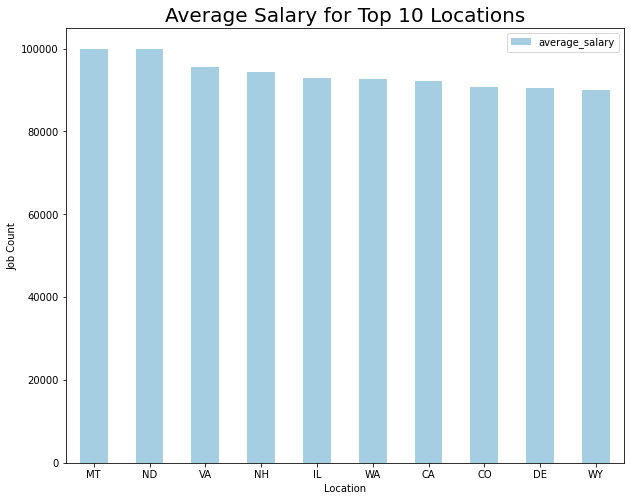

In [ ]:
#plotting bar graph for visualization
PSS.set_index(PSS.Location, drop=True, inplace=True)
PSS.plot(kind='bar', label='index', figsize = (10,8), colormap='Paired', stacked=False) 
plt.xlabel('Location')
plt.ylabel('Job Count')
plt.xticks(rotation=0)
plt.title('Average Salary for Top 10 Locations', fontsize=20)

## 24.Average Salary across job role

In [ ]:
def getSqlMethod8():
  AS = psql.sqldf("select Job_Type, avg(Queried_Salary) as Average_Salary from JobData where Queried_Salary is not null group by Job_Type")
  return AS
  
  

getSqlMethod8()

,Job_Type,Average_Salary
0,data_analyst,50964.863358
1,data_engineer,103219.724438
2,data_scientist,101918.993315


Text(0.5, 1.0, 'Average Salary by Job Type')

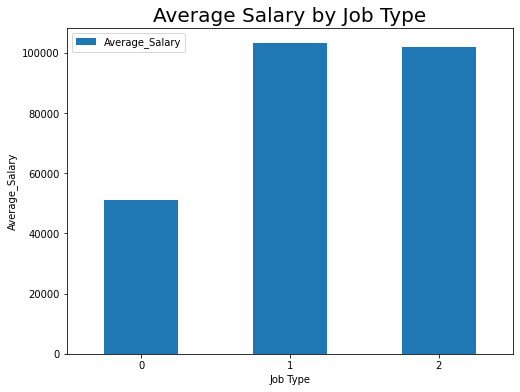

In [ ]:
getSqlMethod8().set_index(getSqlMethod8().Job_Type, drop=True, inplace=True)
getSqlMethod8().plot(kind='bar', figsize = (8,6), stacked=False,) 
plt.ylabel('Average_Salary')
plt.xticks(rotation=0)
plt.xlabel('Job Type')
plt.title('Average Salary by Job Type', fontsize=20)

## 25.High salary- learn Python or R?

In [ ]:
DSBP = psql.sqldf("select Queried_Salary from JobData where (Python = 1 and R = 0) and Queried_Salary is not null and (Job_Type = 'data_scientist')")
DSAS = psql.sqldf("select Queried_Salary from JobData where (R = 1 and Python = 0) and Queried_Salary is not null and (Job_Type = 'data_scientist')")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


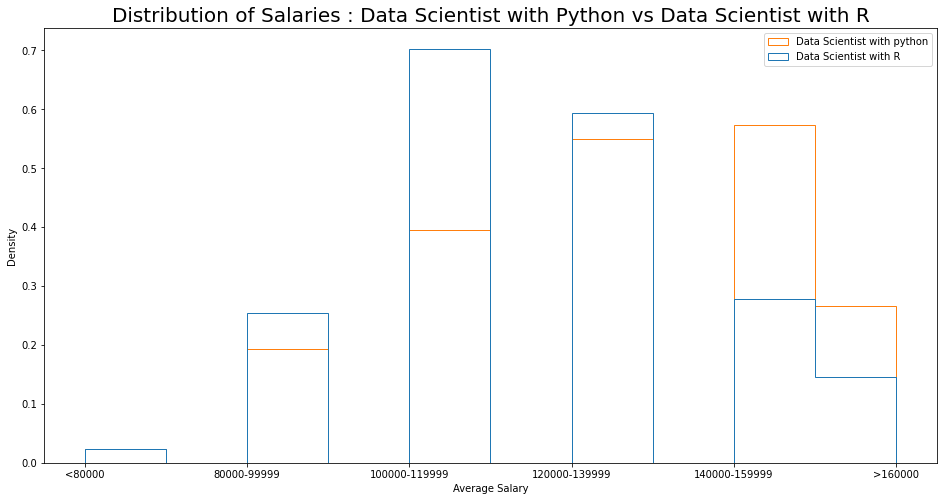

In [ ]:
plt.figure(figsize=(16,8))
labels_hist = ['Data Scientist with R', 'Data Scientist with python']
plt.hist([DSAS.Queried_Salary, DSBP.Queried_Salary], histtype= 'step', label = labels_hist, density = True) 
plt.title('Distribution of Salaries : Data Scientist with Python vs Data Scientist with R', fontsize=20)
plt.xlabel('Average Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

## 26.Data Analyst vs Data Scientist vs Data Engineer

In [ ]:
DADS = psql.sqldf("select Queried_Salary from JobData where Queried_Salary is not null and (Job_Type = 'data_analyst')")
DSDS = psql.sqldf("select Queried_Salary from JobData where Queried_Salary is not null and (Job_Type = 'data_scientist')")
DSDE = psql.sqldf("select Queried_Salary from JobData where Queried_Salary is not null and (Job_Type = 'data_engineer')")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


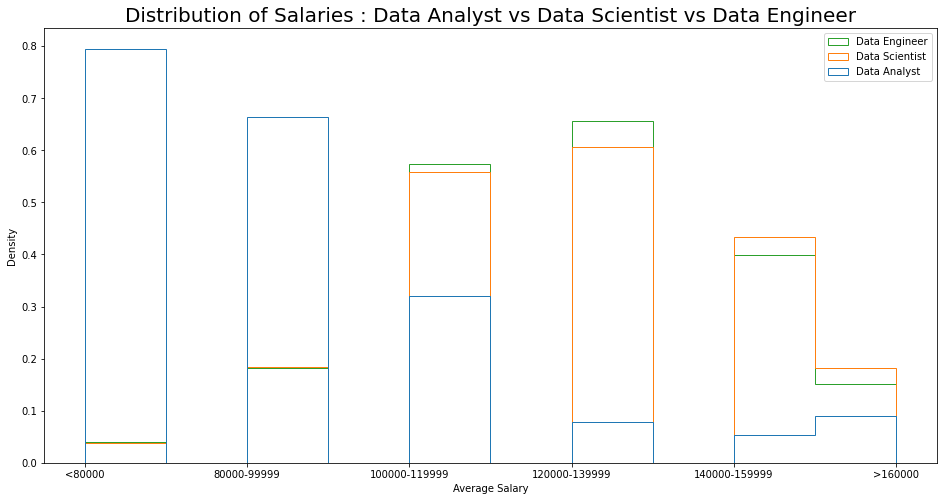

In [ ]:
plt.figure(figsize=(16,8))
labels_hist = ['Data Analyst', 'Data Scientist', 'Data Engineer']
plt.hist([DADS.Queried_Salary, DSDS.Queried_Salary, DSDE.Queried_Salary], histtype= 'step',  label = labels_hist, density = True) 
plt.title('Distribution of Salaries : Data Analyst vs Data Scientist vs Data Engineer', fontsize=20)
plt.xlabel('Average Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

# 27.Most Prefered Programming language across job roles?

In [ ]:
def getSqlMethod6():
  PLJT = psql.sqldf("select Job_Type, sum(java) as Java, sum(python) as Python, sum(sas) as SAS, sum(r) as R \
                          from JobData group by Job_Type order by Job_Type")
  return PLJT

getSqlMethod6()

,Job_Type,Java,Python,SAS,R
0,data_analyst,101,512,310,456
1,data_engineer,704,901,67,228
2,data_scientist,675,1912,564,1550


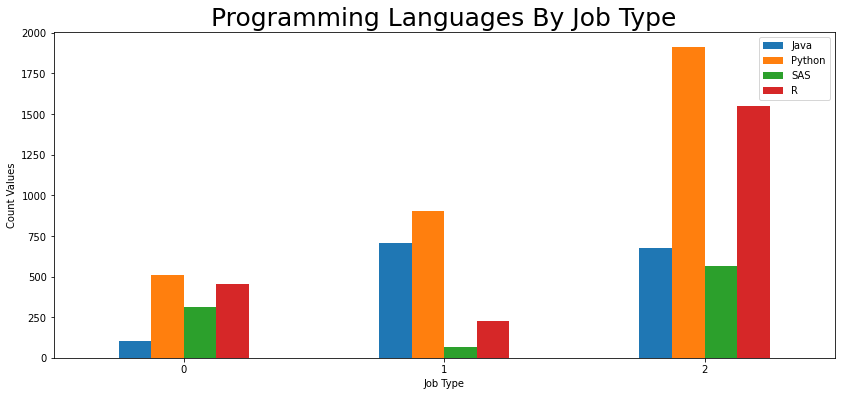

In [ ]:
#plotting bar graph for Programming Languages By Job Type
getSqlMethod6().set_index(getSqlMethod6().Job_Type, drop = True, inplace = True)
getSqlMethod6().plot(kind='bar', figsize=(14,6), stacked = False)
plt.xticks(rotation='horizontal')
plt.title("Programming Languages By Job Type",fontsize = 25)
plt.xlabel('Job Type')
plt.ylabel('Count Values')
plt.show()

# 28.Job Role in Demand

In [ ]:
CJT = psql.sqldf("select distinct Job_Type,count(*) as open_positions from JobData group by Job_Type order by count(*) desc")
CJT.head()

,Job_Type,open_positions
0,data_scientist,2543
1,data_analyst,1793
2,data_engineer,1379


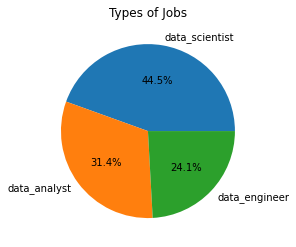

In [ ]:
#plotting a pie chart to visualize job types
job_type_count = pd.DataFrame(CJT)
plt.pie(job_type_count['open_positions'], labels = job_type_count.Job_Type , autopct = "%1.1f%%")
plt.title("Types of Jobs")
plt.show()